In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# import our own work
from ingest import load_experiment
from antenna_pattern import *
from directional_benefit import *
from testbed_plot import *

# Antenna Patterns #

In [24]:

e = load_experiment('../data/testbed/experiment1/2016-09-03_NODE0_0.csv')
print(e.df)

AttributeError: 'Experiment' object has no attribute 'df'

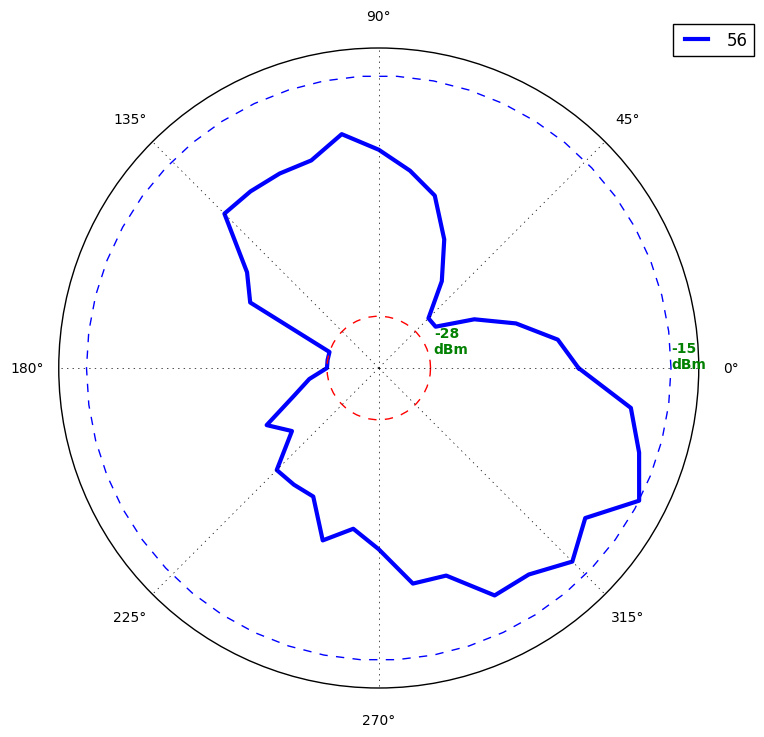

In [23]:
e2 = load_experiment('../data/testbed/experiment1/2016-09-03_NODE12_1.csv')
df = e2.get_dataframe()
plot_antenna_pattern(df, [56], 31)
# benefit2 = compute_benefit(e2.get_dataframe(), 31)
# plot_benefit(benefit2)
# np.mean(benefit2.benefit)

# Directionality Benefit #

A good directional antenna allows a transmitter to amplify or attenuate signals radiated in preferential direction towards a receiver. Accordingly, one approach to quantifying the potential benefit of a directional antenna is to estimate the difference between the maximum and minimum signal strength that an antenna may provide for a fixed physical orientation. Accordingly, the benefit may be computed as follows:

$ B(angle) = \max_{\phi} RSSI(angle, \phi) - \min_{\phi} RSSI(angle, \phi) $

By definition, the benefit of an omnidirectional antenna is zero.

Questions:
  * is there a **best fixed configuration**? if so, how much improvement we got over this best fixed configuration. how do we defiend **best** in this case?

[ 0.          0.15707963  0.31415927  0.4712389   0.62831853  0.78539816
  0.9424778   1.09955743  1.25663706  1.41371669  1.57079633  1.72787596
  1.88495559  2.04203522  2.19911486  2.35619449  2.51327412  2.67035376
  2.82743339  2.98451302  3.14159265  3.29867229  3.45575192  3.61283155
  3.76991118  3.92699082  4.08407045  4.24115008  4.39822972  4.55530935
  4.71238898  4.86946861  5.02654825  5.18362788  5.34070751  5.49778714
  5.65486678  5.81194641  5.96902604  6.12610567]


13.475

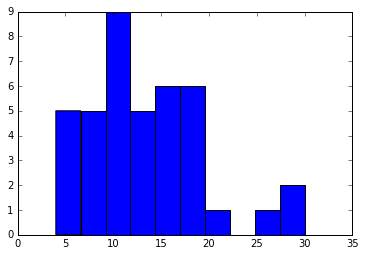

In [4]:
e_node2b = load_experiment('../data/testbed/experiment1/2016-09-03_NODE8_1.csv')

fig = plt.figure(figsize=(12, 12))
ax1 = plt.subplot(121, projection='polar')
ax2 = plt.subplot(122, projection='polar')
benefit2 = compute_benefit(e_node2b.get_dataframe(), 31)
plot_antenna_pattern(e_node2b, [0,64,128,160,192,224], axis=ax1)
plot_benefit(benefit2, axis=ax2)

plt.figure()
plt.hist(benefit2.benefit.values)
np.mean(benefit2.benefit)



What are the factors that affect the benefit. 
 * The benefit depends on the angle. At some angles the benefit may be as little as 3 dBm, while at others can be quite significant. While the benefit usually is similar over adjacent angles, there might be significant differences. 
 * There may also be a dependency on the RSSI achieved i.e., lower rssi nodes may have lower benefit [**conjecture**].

In [5]:
T = testbed_benefit()
median_benefit = [np.median(T[node]) for node in T]
min_benefit = [min(T[node]) for node in T]
max_benefit = [max(T[node]) for node in T]


y = np.arange(0,101)
x = np.percentile(median_benefit, y)
x2 = np.percentile(min_benefit, y)
x3 = np.percentile(max_benefit, y)

plt.figure()
ax1 = plt.subplot(121)
ax1.hist(median_benefit)
plt.xlabel('Directional benefit')
plt.ylabel('Count')
plt.title('Hist of median benefit')

ax2 = plt.subplot(122)
ax2.plot(x, y, lw=3, label='median')
ax2.plot(x2, y, lw=3, label='min')
ax2.plot(x3, y, lw=3, label='max')
ax2.legend(loc='lower right')
plt.xlabel('Directional benefit (dBm)')
plt.ylabel('CDF')

The above CDF plots the min, median, and max benefit for the testbed. The smallest benefit of any node in the tesbed is as low as 3 dBm. The largest benefit is as high as 35 dBm. The median benefit falls in the range of 10 -- 25 dBm. This shows that over a wide range of physical angles, changing the relative phase of the output signals provides a significant benefit.

[19.0, 23.0, 14.0, 18.0, 16.0, 15.5, 10.5, 10.5, 12.5, 12.5, 17.5, 21.0, 18.0, 12.0, 12.0, 14.0]


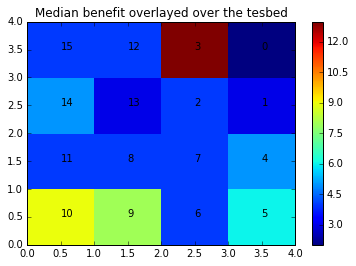

In [6]:
print(median_benefit)
mb_testbed = {}
for node in range(16):
    mb_testbed[node] = min_benefit[node]
    
plot_testbed(mb_testbed)
plt.title('Median benefit overlayed over the tesbed')


The above figure overlays the median benefit on the locations of the nodes on the testbed. The location of the mote is in the center in the square 13,2,7,8. 

It looks like the nodes that are further away get better benefit than those that are close by. Not sure why this would be the case (???).

# TODO #

## Experiments to run ##
  * varitions in link quality with different phases and time. the hypothesis is that small phase changes will lead to similar link quality. additional question is whether this is subject to the receiver's position.
      * experiment design 1: do not rotate the phasor mote. pick a small number of configuration (e.g., [0,64,128,160,192,224]). transmit packets across each one of the phases. Critique: packets transmitted between phases 0 and 64 will always be shorter in time than those between 0, 224. 
      * experiment design 2: a better approach would be to generate all permutations of [0, 64, 128, 160, 192, 224]. this will make sure that all experiments with different distances are ran. Alternatively, you can just pick the order of the phases at random.  Critique: we do not have a measure of what close phases means. are 0 and 64 close enough?
      * experimental design 3: perhaps we should consider more of an exponential sampling of the phases [0, 16, 32, 64,  128, 192, 224]. This will also give you different phase differences potentially giving you a better handle on what is correlated and uncorrelated.
  * the RSSI impacts the benefit of the antenna. 
      * rerun the standard experiment at different power levels. 
  * how does the antenna pattern change over the course of a day?
      * continuously run data collection for a day
      * how long does it take to run the short experiment?
 
## Data analysis ##
  * PRR, LQI (?)

## Open questions ##
  * what can we tell about the best antenna direction?
  * do we need all angle combinations?